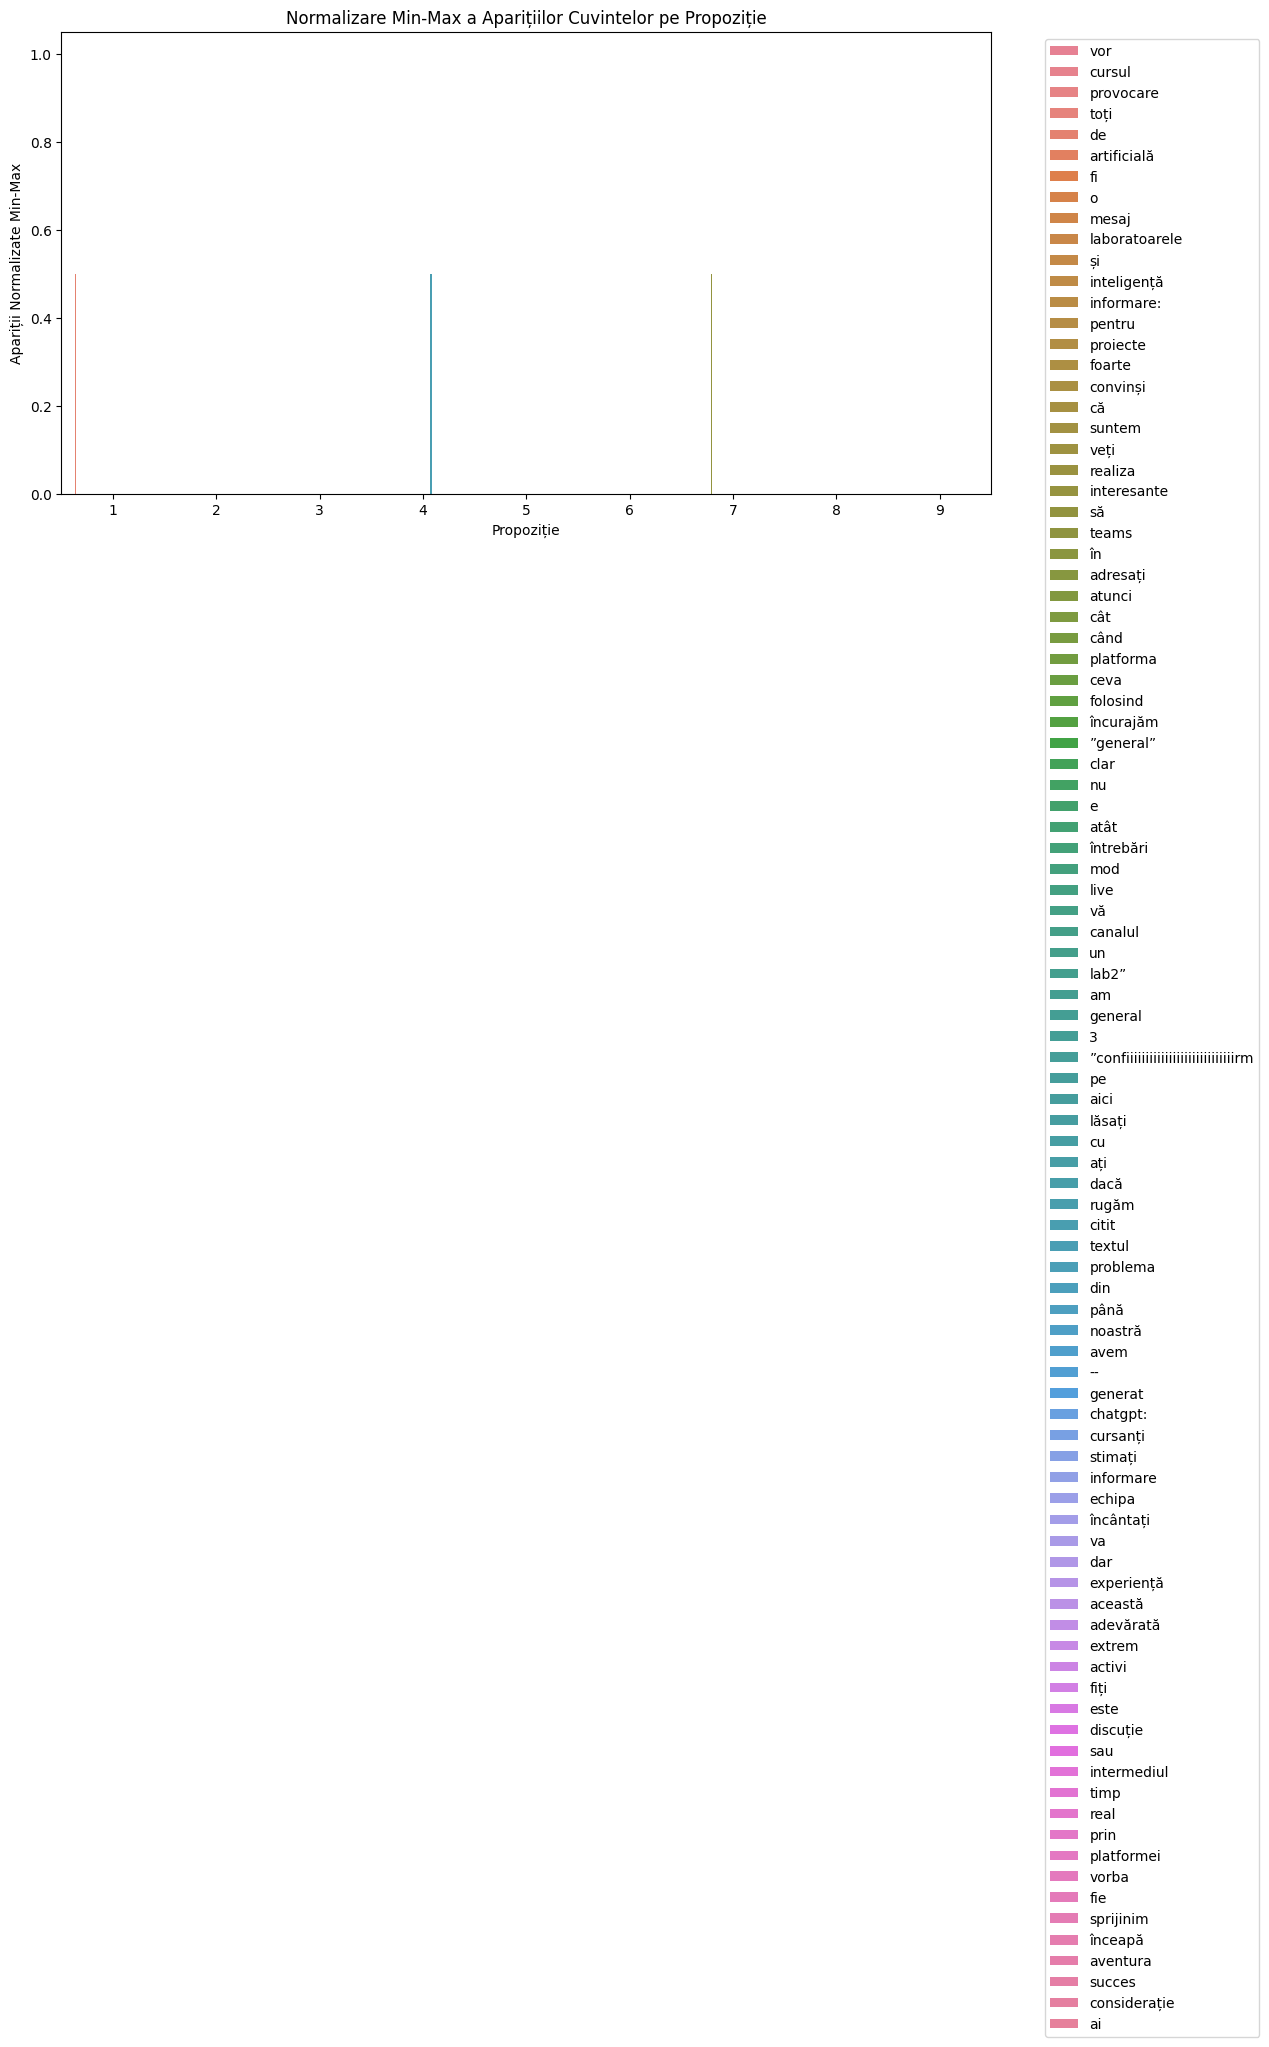

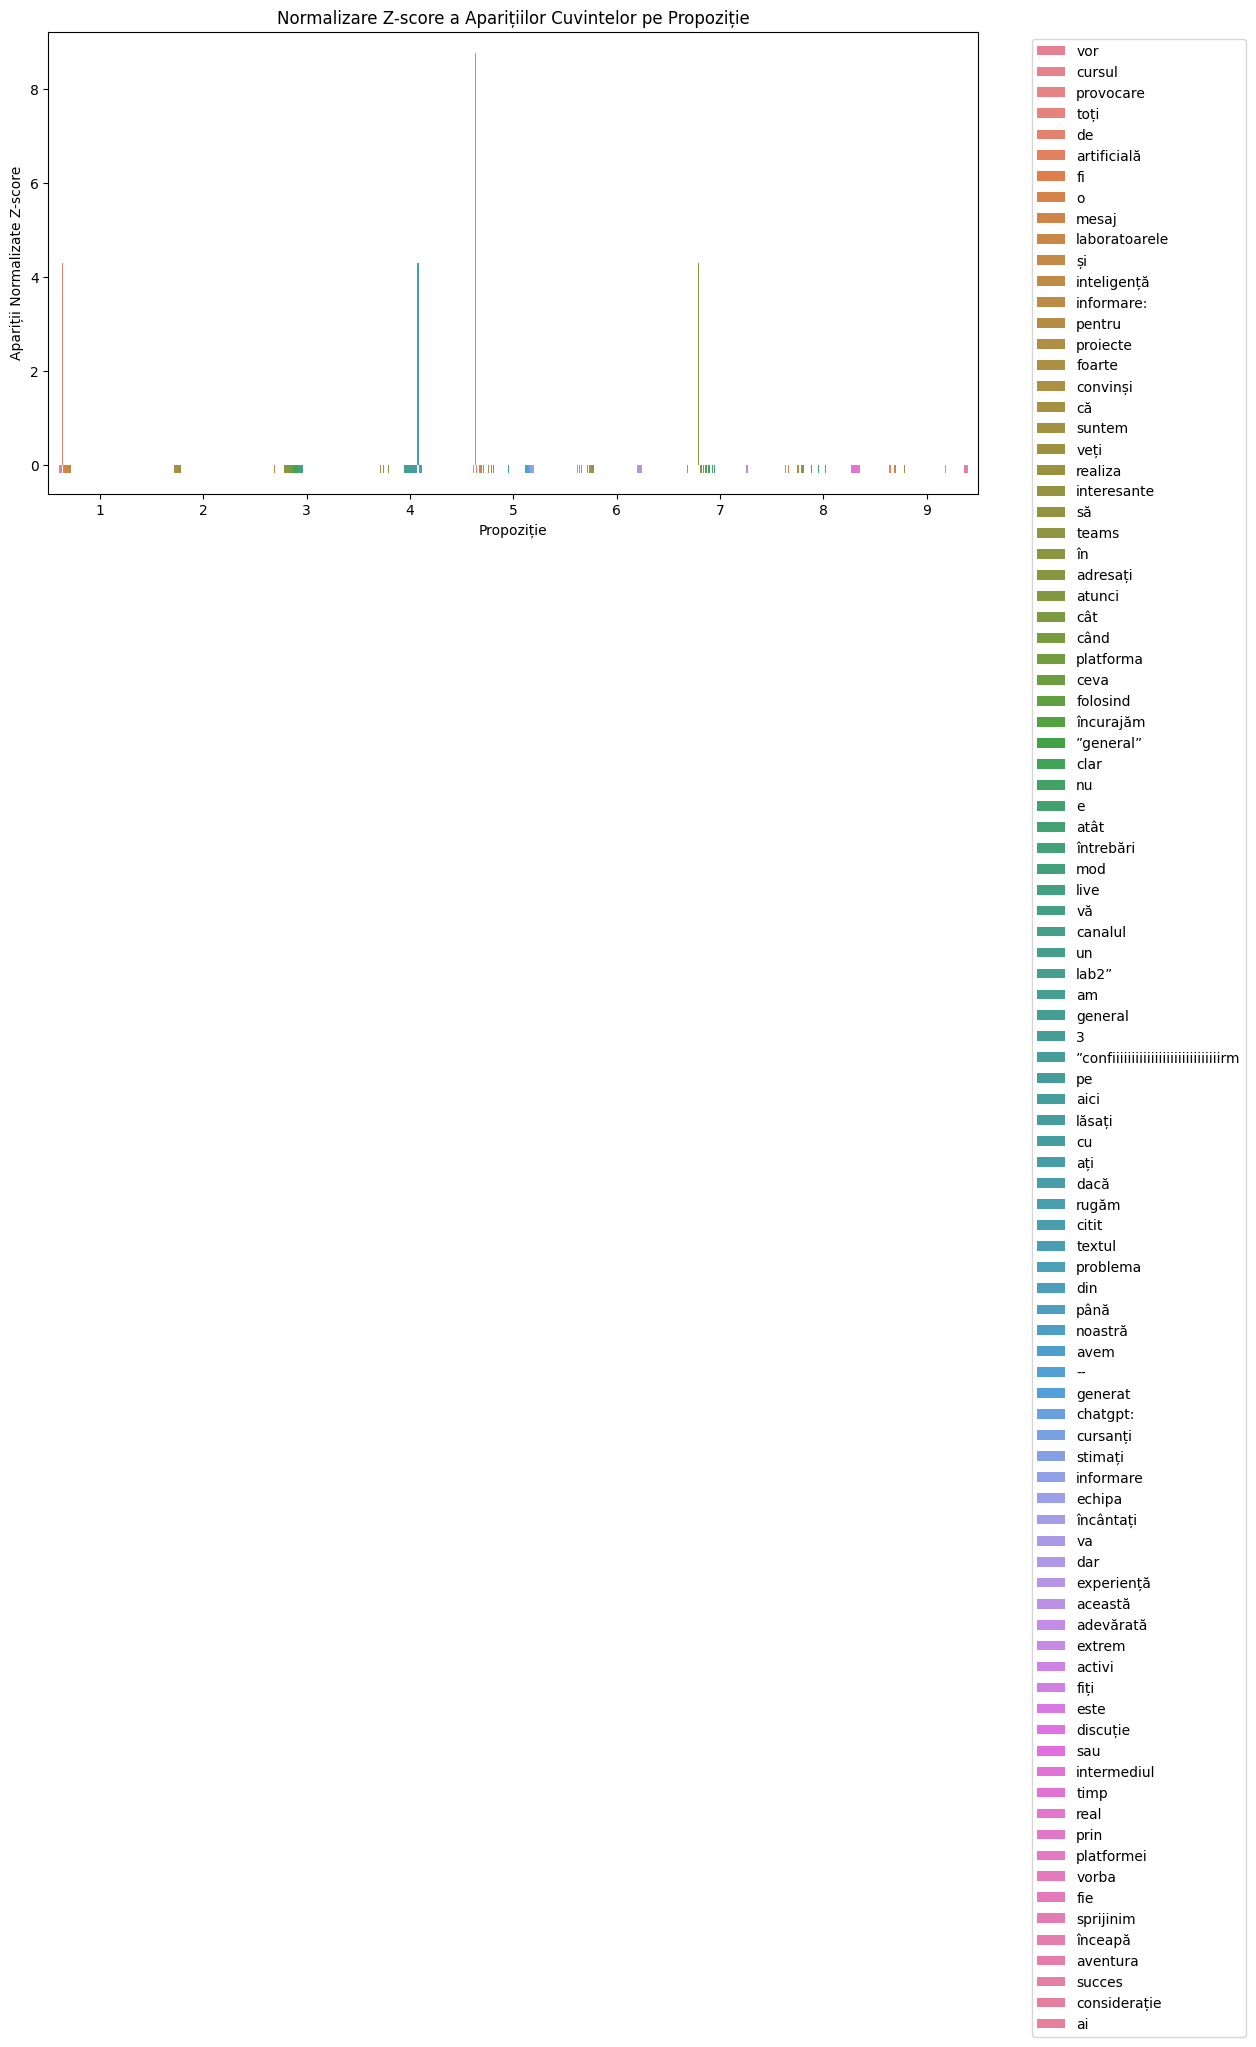

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Citirea textului din fișier
with open('data/texts.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Împărțim textul în propoziții
propozitii = text.split('.')

# Funcție pentru a număra aparițiile cuvintelor într-o propoziție
def numara_cuvinte(propozitie):
    cuvinte = propozitie.lower().translate(str.maketrans('', '', '.,!?')).split()
    return len(cuvinte), {cuvant: cuvinte.count(cuvant) for cuvant in set(cuvinte)}

# Creăm un DataFrame pentru a stoca numărul de apariții a cuvintelor la nivelul propozițiilor
data = []
for i, propozitie in enumerate(propozitii):
    numar_cuvinte, aparitii = numara_cuvinte(propozitie)
    for cuvant, count in aparitii.items():
        data.append({'Propozitie': i+1, 'Cuvant': cuvant, 'Aparitii': count})

df = pd.DataFrame(data)

# Normalizare Min-Max
scaler_min_max = MinMaxScaler()
df['Aparitii_Min_Max'] = scaler_min_max.fit_transform(df[['Aparitii']])

# Normalizare Z-score
scaler_z_score = StandardScaler()
df['Aparitii_Z_Score'] = scaler_z_score.fit_transform(df[['Aparitii']])

# Plot pentru normalizarea Min-Max
plt.figure(figsize=(12, 6))
sns.barplot(x='Propozitie', y='Aparitii_Min_Max', hue='Cuvant', data=df)
plt.title('Normalizare Min-Max a Aparițiilor Cuvintelor pe Propoziție')
plt.xlabel('Propoziție')
plt.ylabel('Apariții Normalizate Min-Max')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot pentru normalizarea Z-score
plt.figure(figsize=(12, 6))
sns.barplot(x='Propozitie', y='Aparitii_Z_Score', hue='Cuvant', data=df)
plt.title('Normalizare Z-score a Aparițiilor Cuvintelor pe Propoziție')
plt.xlabel('Propoziție')
plt.ylabel('Apariții Normalizate Z-score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()